# MLabsPy

I origonally started this project while working for an in-house AV company, mostly as a 
Power Distribution Technicain and Rigger, in my speare time.  It was only a basic script 
that ploted 3 graphs, made some HTML files with plotly and had to be run from the console. 

MLabsPy is a python parser for the Motion Labs Power Meter log format.  

The data by itself is usless without context, this is the starting block to help bring this 
data into a position to be ploted or inserted into a Database to give it some more context.  
With Big Data and all the tools avalable, an events company with enough forward thinking 
could use this data along with sales notes, client check in notes, in room support calls, 
rentals, wifi codes, recordings, invoices, salesforce records, worker notes reguarding a 
specific event and organize it by timestamp to get better insite into how your services 
are being used and patterens of use. 



## PM-XXX Series Power Meter Logger

Details for the local Data logging format and how to import into excel is discussed in the 
manual (pg 23, 8. Local Data Logging):

https://www.motionlabs.com/wp-content/uploads/PM-XXX-UM.pdf

Excel is slow with large datasets (45 x 7000), unless you have a good workstation.  This python program (using numpy) is much faster in my opinion. Jupyter Notebooks has been very helpful in development, as well as Spyder.  The plots I made with excel in the past didn't look very large nor detailed.  matplotlib does a good job marking larger plot images, plotly made some nice HTML/Js graphs with the ablity to zoom in and look at the data in ways you can't with excel 
or numbers

## Prerequisets 

* numpy
* scipy
* matplotlib (plot test)
* jupyter-notebooks (optional)

## How-To Use

Bellow is all the information about the columns in the log file and the tag names to
access the data after it has been parsed.  Many of the tags have been shortened from
the origonal one.  I have also added tags for plots that have multiple lines plotted.


### example of plotting plotData(tag) with matplotlib

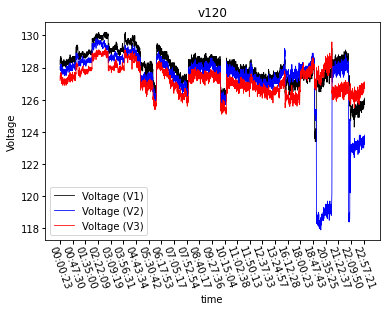

In [12]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import MLabsPy as m
ML = m.MLabsPy('MLabsPy3.CSV')

p = ML.plotData('v120')
plt.title('v120')
ts = p['x']
plot = p['plot']

for d in plot:
    plt.plot(ts, d['dataset'], label = d['tag'], color = d['color'], linewidth='0.8')

plt.tick_params(width=1, pad=1, labelsize=10)
while 35 < len(ts):
    ts = ts[::2]  

plt.xticks(ts,rotation=-70) 
plt.xlabel("time")
plt.ylabel('Voltage')
plt.legend()
plt.show()   

In [2]:
ML.getCSVdata('v120')

['ts,L1,L2,L3',
 '00:00:23,128.2,127.9,127.2',
 '00:00:45,128.3,127.9,127.3',
 '00:01:07,128.5,128.1,127.5',
 '00:01:30,128.4,127.9,127.4',
 '00:01:51,128.3,127.9,127.3',
 '00:02:13,128.3,127.8,127.3',
 '00:02:35,128.3,127.9,127.3',
 '00:02:57,128.4,128.0,127.4',
 '00:03:20,128.7,128.2,127.7',
 '00:03:42,128.5,128.1,127.5',
 '00:04:04,128.6,128.1,127.5',
 '00:04:27,128.5,128.1,127.5',
 '00:04:48,128.5,128.2,127.6',
 '00:05:10,128.3,128.0,127.4',
 '00:05:32,128.1,127.6,127.0',
 '00:05:55,128.5,128.1,127.5',
 '00:06:17,128.4,128.0,127.4',
 '00:06:39,128.3,127.9,127.3',
 '00:07:01,128.3,127.8,127.3',
 '00:07:23,128.3,127.9,127.3',
 '00:07:47,128.3,128.0,127.4',
 '00:08:08,128.2,127.8,127.2',
 '00:08:30,128.3,127.8,127.3',
 '00:08:52,128.0,127.6,127.0',
 '00:09:14,128.0,127.7,127.0',
 '00:09:37,128.4,127.9,127.3',
 '00:09:58,128.1,127.7,127.1',
 '00:10:20,128.4,128.0,127.4',
 '00:10:43,128.1,127.6,126.9',
 '00:11:05,128.3,127.9,127.2',
 '00:11:27,128.3,127.8,127.2',
 '00:11:48,128.2,127.8,

## example of a basic multi
nothing specal, custom matplotlib set up

### plotData(tag) returns this data structure: 

```
{
    'x': [1,2,3,4,5],
    'stats': {
        'min': 2.,
        'max': 10.,
        'median': 0.,
        'mean': 0.,
        'mode': [ 0, 1 ]
    },
    'plot': [ {  
        'dataset': [ 2.,4.6,6.4,8.,10. ],
        'tag': "float test",
        'color': 'red'
    }],
}
```


In [13]:
ML.plotData('v208')

{'x': array(['00:00:23', '00:00:45', '00:01:07', ..., '22:59:13', '22:59:35',
        '22:59:57'], dtype='<U8'),
 'plot': [{'dataset': array([221.7, 221.7, 222.1, ..., 217. , 217.5, 217.8], dtype=float32),
   'tag': 'Voltage (U12)',
   'color': 'Black'},
  {'dataset': array([221.1, 221.1, 221.5, ..., 216.3, 216.7, 217.1], dtype=float32),
   'tag': 'Voltage (U23)',
   'color': 'Blue'},
  {'dataset': array([221.3, 221.4, 221.8, ..., 216.5, 217. , 217.2], dtype=float32),
   'tag': 'Voltage (U31)',
   'color': 'Red'}],
 'stats': {'min': 212.89999389648438,
  'max': 224.89999389648438,
  'median': 221.10000610351562,
  'mean': 220.80143941573766,
  'mode': [221.0, 285]}}

## Easy Ploting
the following is an example of generating a plot using the MLabsPy.Plot class, it is very straight forward. 

* 

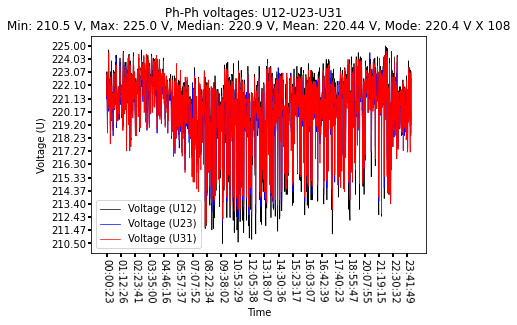

<Figure size 3300x2550 with 0 Axes>

In [15]:
ML = m.MLabsPy('MLabsPy2.CSV')
data = ML.plotData('v208')
PLOT=m.Plot('v208')
PLOT.go(data)

## Save plot to directory


In [ ]:
data = ML.plotData('THDX')
PLOT=m.Plot('THDX', 'Notebook')
PLOT.go(data)


### column access

you can access your column data by using the object name and the tag name to return
a numpy array.  I made it easy that way.  the module has 3 objects, one for parsing
one for labels and one for plotting.  The parser is the main part of this module, 
MLabsPy.Parse(file).  It expects a log files from the Motion Labs logger to be in the
correct format, the 45 columns list can be found in MLabsPy.Labels.col.  I have also 
listed the access tags bellow, with some basic Details

The MLabsPy.Plot(tag) class is included to show what the data looks like when plotted. 
 
The MLabsPy.Labels(tag) class has the labels for the data in the CSV file.  

# Record Time
This is the timestap that this record was taken, it logs every 10-11 secs

log file column: "Record Time"

### tags
* 'ts'

# Phase-Nutral voltages - 120 Volts

log file column: "L1", "L2", "L3"

### tags
* 'v120'
* 'L1'
* 'L2'
* 'L3'

# Phase-Phase voltages - 208 Volts

log file column: "L12", "L23", "L31"

### tags
* 'v208'
* 'L12'
* 'L23'
* 'L31'

# Phase currents

log file column: "I1", "I2", "I3", "In"

### tags
* 'amps'
* 'I1'
* 'I2'
* 'I3'
* 'In'

# Freqency

* Freq, logged as Hz

log file column: " Freq."

### tags
* 'Freq'

# Total power factor (pf) 

log file column: " PF "

### tags
* "PF"

# Average Phase-Nutral voltage

log file column: "V-avr"

### tags
* 'Vavr'

# Average Phase-Phase voltage

log file column: "U-avr"

### tags
* 'Uavr'

# Average current

log file column: "I-avr"

### tags
* 'Iavr'
 

#  Total Active Power (kW), reactive power (kVAr) and apparent power (kVA)

* P is Active power or real power, logged as kW
* Q is Reactive power, logged as kVar
* S is Complex power, logged as kVA

log file column: "P", "Q", "S"

### tags
* "P"
* "Q"
* "S"

##  Total Active Power (kW) 

* P1, P2, P3 as kW

log file column: " P1", " P2", " P3"

### tags
* "kWatt"
* "P1"
* "P2"
* "P3"

## Total reactive power (kVAr) 

* Q1, Q2, Q3 as kVar

log file column: " Q1", " Q2", " Q3"

### tags
* "kVAr"
* "Q1"
* "Q2"
* "Q3"



# Demands

* Demands: Phase Currents - dI1 dI2, dI3, dIo as Amps
* Demands: Active Power - dkW as kW
* Demands: Reactive Power - dkVAr as kVAr

log file column: " dI1", " dI2", " dI3", " dIo", " dkW", " dkVAr"

### tags
* 'damps'
* 'dI1'
* 'dI2'
* 'dI3'
* 'dIo'
* "dkW"
* "dkVAr"


# Total harmonic distortion: 

The Total Harmonic Distortion (THD) mode displays the following:

* THD per phase to Nutral - THD L1, THD L2, THD L3
* THD per phase to phase - THD L12 THD L23 THD L31
* THD current per phase - THD I1 THD I2 THD I3
* THD neutral current - THD In

log file column: "THD L1", "THD L2", "THD L3", "THD L12", "THD L23", "THD L31", 
                    "THD I1", "THD I2", "THD I3", "THD In"

### tags
*    "THDX"
*    "THDY"
*    "THDZ"
*    "THDIn"
*    "THDL1"
*    "THDL2"
*    "THDL3"
*    "THDL12"
*    "THDL23"
*    "THDL31"
*    "THDI1"
*    "THDI2" 
*    "THDI3"


# Log Counters

* Import Power 
* Export Power 
* Inductive Power
* Capacitive Power

##  Import / Export Power (kWh) 
Import power is the total kWh’s used, export is not always connected, depends 
on your unit. If the meter is a line connected device export power is not used.

log file column: " kWh_Im", " kWh_Ex" 

### tags
* "kWh"
* "kWhIm",
* "kWhEx"

## Inductive / Capacitive Power (kVArh)
Inductive Power and Capacitive Power in kVArh

log file column: " kVArh-I", " kVArh-C" 

### tags:
* "kVArh"
* "kVArhI"
* "kVArhC"